# Изучение рынка заведений общественного питания Москвы

## Цель и задачи  

**Цель:** Провести исследовательский анализ данных рынка заведений общественного питания Москвы на основе данных из Яндекс карт и Яндекс Бизнес на лето 2022 года.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
4. Сформулировать выводы по проведённому анализу.


## Данные

Для анализа поступили данные о рынке заведений общественного питания Москвы. Данные состоят из двух датасетов:

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` —  информация о среднем чеке в заведениях общественного питания;

### Описание датасета `rest_info`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  * 0 — заведение не является сетевым;
  * 1 — заведение является сетевым.
- `seats` — количество посадочных мест


### Описание датасета `rest_price`

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `df` и `df_price`.

In [1]:
!pip install phik -U

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные bank_df и clients_df
df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
df_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
# Выводим первые строки датафрейма на экран
df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов в отличном виде
- Все представленные данные хранятся в типах данных `int64`,  `float64`, `object`. Значения в столбцах `id`, `name`, `category`, `address`, `district` и `hours` представлены объектами. Часть их них показывает наличие у клиента того или иного признака и содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
- Пропуски содержатся только в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Замечен столбец `id`, которого нет в описании данных, возможно, это индикатор заказа - первичный ключ датасета.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [6]:
# Выводим первые строки датафрейма на экран
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов в отличном виде
- Все представленные данные хранятся в типах данных `float64`, `object`. Значения в столбцах `id`, `price`, `avg_bill` представлены объектами
- Пропуски содержатся во всех столбцах, кроме `id`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Замечен столбец `id`, которого нет в описании данных, возможно, это индикатор заказа - первичный ключ датасета.

Первичное знакомство показывает, что данные хорошего качества — они соответствуют описанию и выглядят корректными. Настало время следующего этапа — предобработки данных.

### Подготовка единого датафрейма

Задача проекта предполагает создание портрета заказов для анализа заведений. Поэтому можно соединить данные о заказах в датасетах `df` и `df_price`

Каждая строка в этих датафреймах — это информация о заказе, поэтому такие данные удобно соединить в один датафрейм, который можно использовать для поиска закономерностей в данных. Соединять данные будем по идентификатору заказа. При соединении оставим только полные данные — это значит, что значение `id` клиента должно быть в двух датафреймах.

Соединим данные, используя значение параметра `how` по умолчанию — `'inner'`. Это позволит оставить только полные данные по клиентам банка.

In [8]:
# Соединяем данные в единый датафрейм df
df = df.merge(df_price, on='id', how='left')

In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех пользователях сохранилась.

---

Создание новой переменный is_24_7:
 * логическое значение True — если заведение работает ежедневно и круглосуточно;
 * логическое значение False — в противоположном случае.

In [10]:
def is_open_24_7(hours):
    # Проверяем, является ли значение строкой
    if isinstance(hours, str):
        # Проверяем наличие ключевых слов
        if 'ежедневно' in hours and 'круглосуточно' in hours:
            return True
    return False

# Применяем функцию к столбцу hours и создаем новый столбец is_24_7
df['is_24_7'] = df['hours'].apply(is_open_24_7)
df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN,True


## 2. Предобработка данных

### 2.1. Оптимизируем типы данных

Здесь работы не так много — понадобится только провести оптимизацию целочисленных данных в столбце `seats` датасета `rest_info`.

Так как в столбце есть значения NaN, переведем в тип Int64

In [11]:
# Оптимизируем целочисленный тип данных в датафрейме df
df['seats'] = df['seats'].astype('Int64')

In [12]:
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                  Int64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
is_24_7                 bool
dtype: object

In [13]:
df_price.dtypes

id                    object
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Типы данных были успешно оптимизированы с понижением размерности целочисленных данных.

---

### 2.2. Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбцах `hours` и `seats` датафрейма `df`. Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [14]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
is_24_7                 0
dtype: int64

In [15]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
is_24_7              0.000000
dtype: float64

В датафрейме `df` обнаружено 536 пропусков в столбце `hours` — это 6% данных. Количество пропусков не такое большое, поэтому их можно и удалить, чего не сказать о столбце `seats`, где 43% пропусков.

Пропуски в этом столбце могут быть вызваны:
- Тип заведения такой, что там не предусмотрены посадочные места, например, заведения быстрого питания.
- При обработке данных произошёл технический сбой.

Проверим первую гипотезу, для этого отберем строки со значениями NaN и будем смотреть на тип заведения.

In [16]:
df[df['seats'].isna()]['category'].value_counts()

кафе               1160
ресторан            773
кофейня             662
бар,паб             297
быстрое питание     254
пиццерия            206
столовая            151
булочная            108
Name: category, dtype: int64

Видно, что большая часть пропусков в категориях кафе и ресторан, что указывает на неправильные догадки, поэтому, можно сделать вывод о том, что произошел технический сбой при обработке данных, следовательно, пока что не будет ничего делать с пропусками, дабы не потерять нужные данные в других столбцах.

Рассмотрим пропуски в столбцах датасета df_price

Сначала стоит проверить, не связаны ли между собой пропуски в определенных столбцах

In [17]:
# Применяем метод isna() к датафрейму df
df_price.isna().sum()

id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64

In [18]:
# Подсчитываем долю строк с пропусками
df_price.isna().sum() / df.shape[0]

id                   0.000000
price                0.088389
avg_bill             0.028789
middle_avg_bill      0.108137
middle_coffee_cup    0.419105
dtype: float64

В датафрейме `df_price` обнаружено 743 пропусков в столбце `price` — это 9% данных. Количество пропусков не такое большое, как и в столбцах `avg_bill`, `middle_avg_bill`, поэтому их можно и удалить, чего не сказать о столбце `middle_coffee_cup`, где 42% пропусков.

Пропуски в этом столбце могут быть вызваны:
- Пропуски связаны с другими столбцами
- При обработке данных произошёл технический сбой.

Проверим первую гипотезу, для этого отберем строки со значениями NaN и будем смотреть на средний счет и заказ в заведении.

In [19]:
df_price[df_price['middle_coffee_cup'].isna()]

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN
5,96ebceb1a09e4e3191133b9fe0379a64,средние,Средний счёт:199 ₽,199.0,NaN
...,...,...,...,...,...
4053,962800540173458486f3c465437c2d8b,средние,Цена бокала пива:от 140 ₽,NaN,NaN
4054,4277890d659341848d7051cbf2e51f51,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN
4055,026cbc478f9b4c3294a83458dcd89982,средние,NaN,NaN,NaN
4056,71cc394927204d45b81c3a91edb47955,NaN,Средний счёт:50–250 ₽,150.0,NaN


Из описания данных можно было и догадаться, что пропуски в данном столбце, скорее всего, будут связаны с столбцом avg_bill, так как там есть следующее утверждение: <b>"Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт."</b>
 

Поэтому, пока что не будет обрабатывать пропуски в этом столбце, дабы не потерять нужные данные,

Далее проверим, встречаются ли в данных значения-индикаторы, которые можно рассматривать как пропуски. Иногда для анализа поступают уже частично или полностью подготовленные данные. Это поможет понять качество данных и избежать ошибок при их агрегации, когда значение-индикатор будет учитываться при расчёте среднего или медианы, что исказит исходные данные.

Посмотрим на уникальные значения в ключевых данных — среди них рейтинг заведения, индикатор сетевого заведения, кол-во посадочных мест, число с оценкой среднего чека, число с оценкой одной чашки капучино.

In [20]:
# Проверяем уникальные значения в столбцах
for column in ['rating', 'chain', 'seats']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце rating:
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5. ]

Уникальные значения в столбце chain:
[0 1]

Уникальные значения в столбце seats:
<IntegerArray>
[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
 ...
  644,  650,  660,  675,  760,  920, 1040, 1200, 1288, <NA>]
Length: 230, dtype: Int64



In [21]:
# Проверяем уникальные значения в столбцах
for column in ['middle_avg_bill', 'middle_coffee_cup',]:
    print(f'Уникальные значения в столбце {column}:')
    print(df_price[column].sort_values().unique())
    print()

Уникальные значения в столбце middle_avg_bill:
[0.000e+00 3.000e+01 5.000e+01 6.700e+01 9.000e+01 1.000e+02 1.070e+02
 1.100e+02 1.200e+02 1.250e+02 1.300e+02 1.350e+02 1.400e+02 1.410e+02
 1.500e+02 1.550e+02 1.600e+02 1.650e+02 1.670e+02 1.700e+02 1.750e+02
 1.800e+02 1.850e+02 1.900e+02 1.950e+02 1.990e+02 2.000e+02 2.050e+02
 2.090e+02 2.100e+02 2.150e+02 2.200e+02 2.250e+02 2.290e+02 2.300e+02
 2.350e+02 2.400e+02 2.450e+02 2.500e+02 2.550e+02 2.600e+02 2.610e+02
 2.650e+02 2.660e+02 2.690e+02 2.700e+02 2.750e+02 2.800e+02 2.840e+02
 2.850e+02 2.900e+02 2.910e+02 2.950e+02 2.980e+02 2.990e+02 3.000e+02
 3.010e+02 3.040e+02 3.050e+02 3.090e+02 3.100e+02 3.130e+02 3.150e+02
 3.170e+02 3.200e+02 3.210e+02 3.240e+02 3.250e+02 3.280e+02 3.300e+02
 3.350e+02 3.390e+02 3.400e+02 3.430e+02 3.440e+02 3.450e+02 3.490e+02
 3.500e+02 3.520e+02 3.550e+02 3.600e+02 3.620e+02 3.630e+02 3.650e+02
 3.660e+02 3.700e+02 3.720e+02 3.730e+02 3.740e+02 3.750e+02 3.820e+02
 3.830e+02 3.850e+02 3.870e+02

Все значения выглядят корректными. Теперь можно перейти к изучению дубликатов в данных.

---

### 2.3. Явные и неявные дубликаты в данных

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [22]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

In [23]:
# Проверяем полные дубликаты в датафрейме df_price
df_price.duplicated().sum()

0

В датафреймах нет полных дубликатов строк. Проверим неявные дубликаты — значения по `id` заказов должны быть уникальными, то есть каждая строка в данных — уникальный заказ:

In [24]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

In [25]:
# Проверяем неявные дубликаты в датафрейме df_price
df_price.duplicated(subset='id').sum()

0

Тут тоже всё хорошо — каждая строка соответствует уникальному заказу. Теперь проверим корректность написания категориальных значений в данных

In [26]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'hours', 'chain']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00' nan]

Уникальные значения в столбце chain:
[0 1]



Тут также нет ошибок.

---

### 2.4. Промежуточные выводы после предобработки

На этом предобработка завершена. Предоставленные данные хорошего качества и требуют не так много действий по предобработке.

В результате предобработки данных были выполнены следующие действия:

- Изучены пропуски в данных. Пропуски обнаружились в столбце `seats` и составляют около 43% данных столбца. Учитывая это количество, пропуски могут отражать особенности заведения и не являться ошибкой в данных. Поэтому их оставили как есть. Пропуски обнаружились в столбце `middle_coffee_cup` и составляют около 42% данных столбца. Они связаны с столбцом `avg_bill`, поэтому их тоже оставили как есть.
- Данные проверили на явные и неявные дубликаты — в данных их нет.

---

## 3. Исследовательский анализ данных

###  3.1. Количество объектов общественного питания по каждой категории.

In [27]:
# Проверяем распределение данных по значениям столбца category
print('Распределение данных по значениям столбца category:')
df['category'].value_counts(ascending=True)

Распределение данных по значениям столбца category:


булочная            256
столовая            315
быстрое питание     603
пиццерия            633
бар,паб             765
кофейня            1413
ресторан           2043
кафе               2378
Name: category, dtype: int64

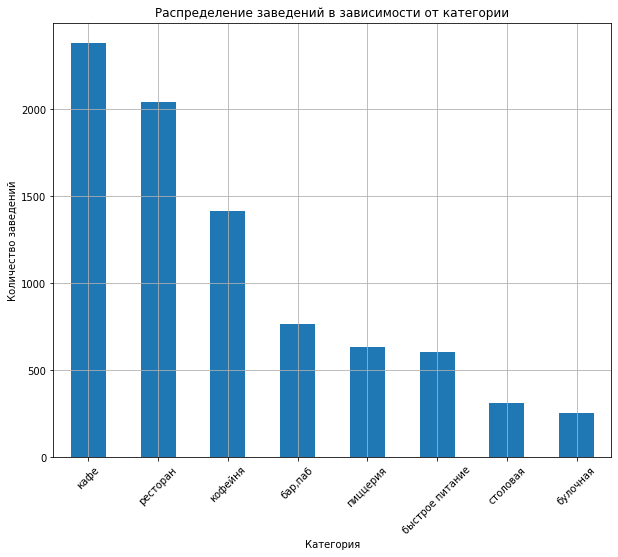

In [28]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['category'].value_counts(ascending=False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Большая часть заведений принадлежит категориям - ресторан, кофейня, кафе. Остальные категории менее популярны, самая непопулярная категория - булочная (54 заведения).

### 3.2. Распределение количества заведений по административным районам Москвы

In [29]:
# Проверяем распределение данных по значениям столбца district
print('Распределение данных по значениям столбца district:')
df['district'].value_counts()

Распределение данных по значениям столбца district:


Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

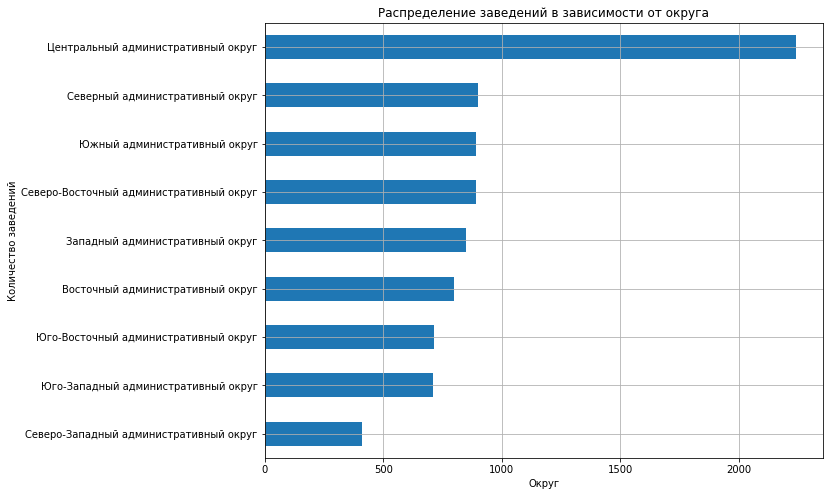

In [30]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['district'].value_counts(ascending=True).plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от округа'
               
)

# Настраиваем оформление графика
plt.xlabel('Округ')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Очень заметно выделяется Центральный округ, где сильно больше заведений, чего и можно было ожидать, в остальных округах кол-во заведений относительно сбалансировано

In [31]:
df_center = df[df['district'] == 'Центральный административный округ'].groupby('category')['id'].count().sort_values(ascending=True)
df_center

category
булочная            50
столовая            66
быстрое питание     87
пиццерия           113
бар,паб            364
кофейня            428
кафе               464
ресторан           670
Name: id, dtype: int64

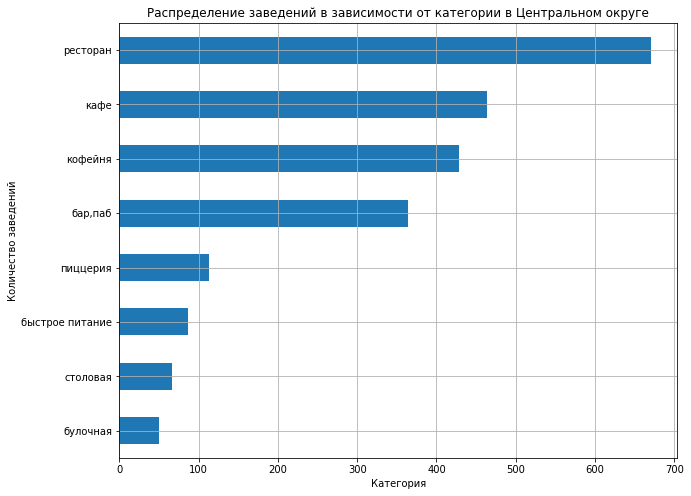

In [32]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_center.plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от категории в Центральном округе'
               
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Нетрудно заметить, что рестораны, кафе и кофейни лидируют по количеству, но также выделяются бары и пабы, догоняющие по кол-ву трех лидеров

### 3.3. Соотношение сетевых и несетевых заведений 

In [33]:
# Проверяем распределение данных по значениям столбца chain
print('Распределение данных по значениям столбца chain:')
df['chain'].value_counts()

Распределение данных по значениям столбца chain:


0    5201
1    3205
Name: chain, dtype: int64

In [34]:
# Проверяем распределение данных по значениям в столбце:
print(f'Распределение данных по значениям столбца `chain`:')
print(df['chain'].value_counts(normalize=True))

Распределение данных по значениям столбца `chain`:
0    0.618725
1    0.381275
Name: chain, dtype: float64


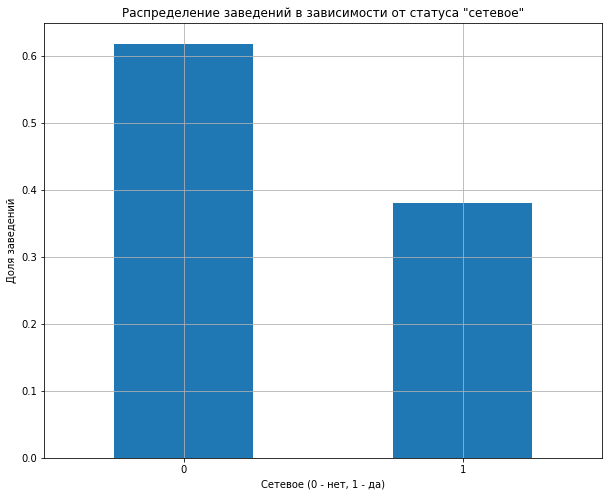

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений в зависимости от статуса "сетевое"'
)

# Настраиваем оформление графика
plt.xlabel('Сетевое (0 - нет, 1 - да)')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

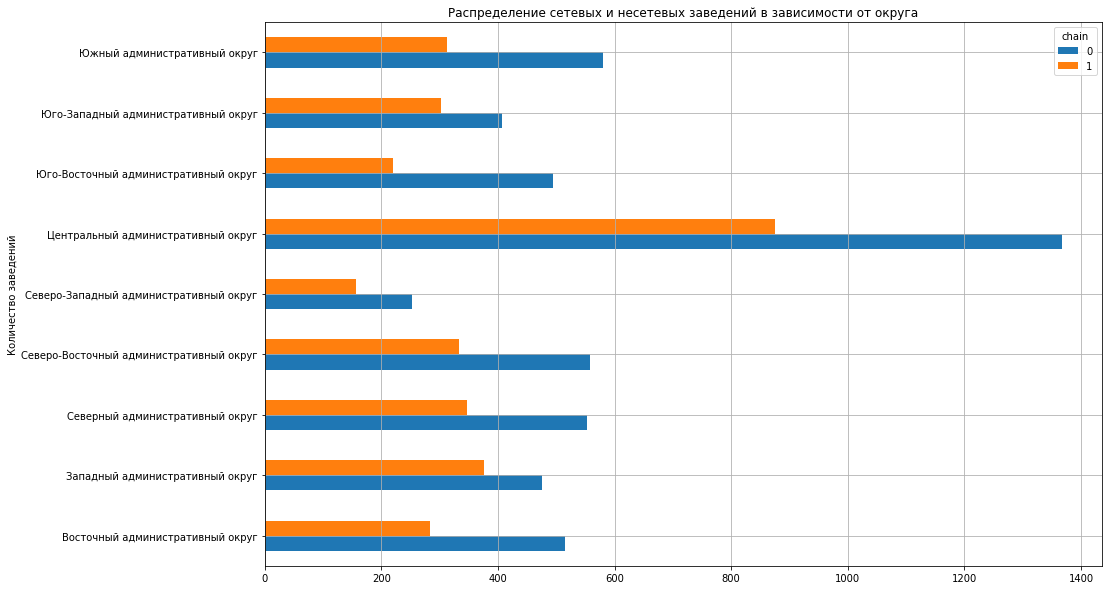

In [36]:
# Построим график столбчатой диаграммы
grouped = df.groupby('district')['chain'].value_counts().unstack(fill_value=0)
grouped.plot(kind='barh',
               title=f'Распределение сетевых и несетевых заведений в зависимости от округа',
               legend=True,
               ylabel='Округ',
               xlabel='Количество заведений',
               rot=0,
               figsize=(15, 10))
plt.grid()

# Выводим график
plt.show()

Заметим, что во всех округах преобладают несетевые заведения и исключений нет

In [37]:
df_chain = df.groupby('category')[['chain', 'id']].agg({'chain': 'mean', 'id': 'count'}).sort_values(by='chain')
df_chain

,chain,id
category,,
"бар,паб",0.220915,765
столовая,0.279365,315
кафе,0.327586,2378
ресторан,0.357318,2043
быстрое питание,0.384743,603
кофейня,0.509554,1413
пиццерия,0.521327,633
булочная,0.613281,256


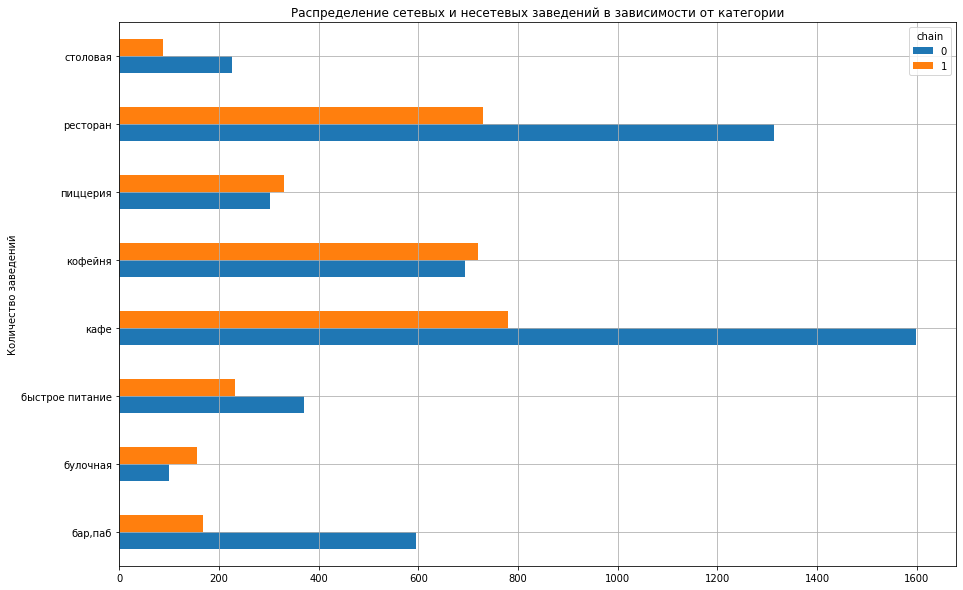

In [38]:
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
grouped.plot(kind='barh',
               title=f'Распределение сетевых и несетевых заведений в зависимости от категории',
               legend=True,
               ylabel='Категория',
               xlabel='Количество заведений',
               rot=0,
               figsize=(15, 10))
plt.grid()

# Выводим график
plt.show()

Заметим, что доля сетевых заведений больше там, где категория заведения менее популярна (меньше в количестве).

### 3.4. Исследование количества посадочных мест

In [39]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df['seats'].describe()

Статистические показатели столбца seats:


count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

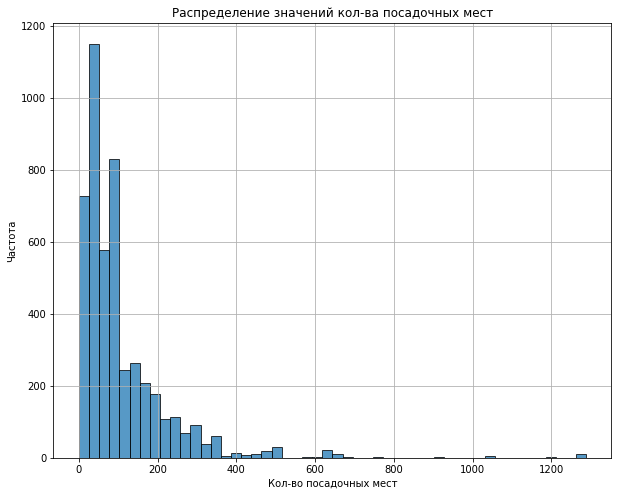

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений кол-ва посадочных мест')
plt.xlabel('Кол-во посадочных мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

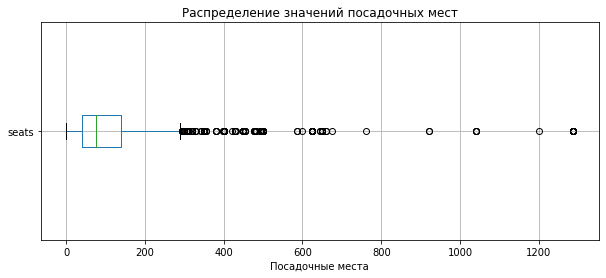

In [41]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце score
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений посадочных мест')
plt.xlabel('Посадочные места')

# Выводим график
plt.show()

Из графиков видно, что распределение не близко к нормальному, заметен длинный хвост справа. Стоит отметить и выбросы, очень редко можно встретить рестораны или кафе, где больше 400 посадочных мест (100 столов по 4 места, например). Так что при дальнейшем анализе такие значения можно будет удалить.

In [42]:
grouped = df.groupby('category')['seats'].median().sort_values(ascending=True)
grouped

category
булочная           50.0
пиццерия           55.0
кафе               60.0
быстрое питание    65.0
столовая           75.5
кофейня            80.0
бар,паб            82.5
ресторан           86.0
Name: seats, dtype: Float64

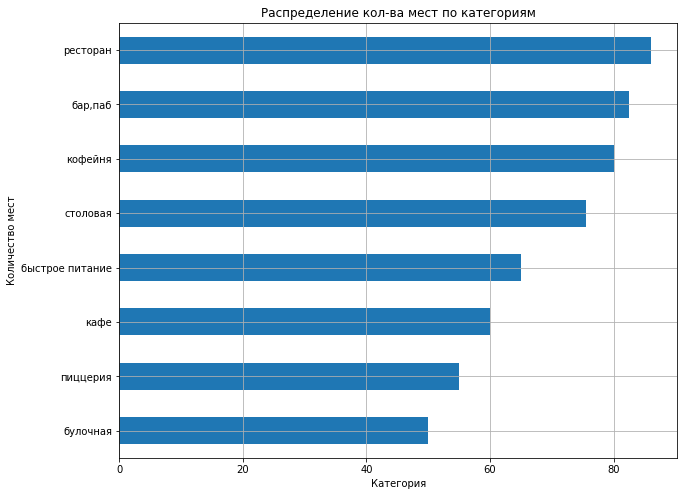

In [43]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
grouped.plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение кол-ва меcт по категориям'
               
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество мест')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Рестораны лидируют по кол-ву посадочных мест, но не сильно, бары и пабы близки к ним. Стоит отметить, что популярная категория <b>кафе</b> находится ближе к концу списка

### 3.5. Исследование рейтинга заведений

In [44]:
# Изучаем статистические показатели столбца rating
print('Статистические показатели столбца rating:')
df['rating'].describe()

Статистические показатели столбца rating:


count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

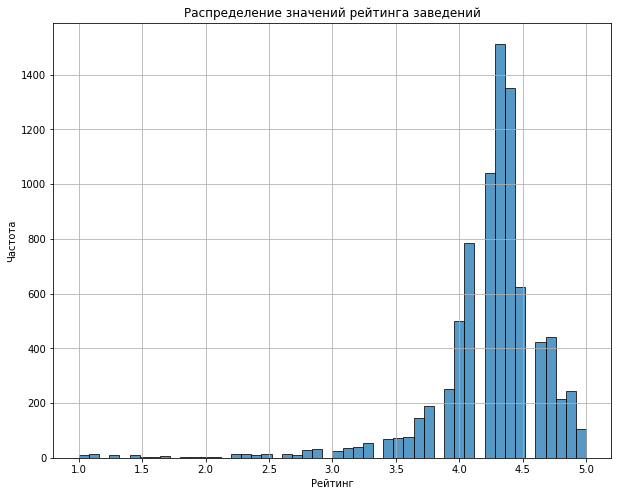

In [45]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['rating'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

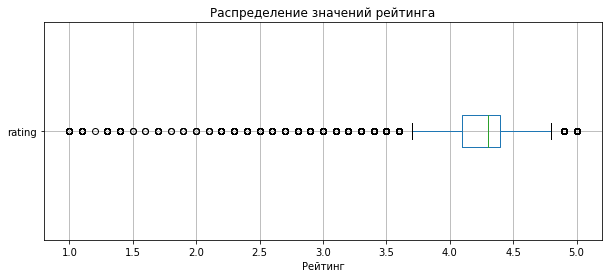

In [46]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 4))

# Строим диаграмму размаха значений в столбце score
df.boxplot(column='rating', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений рейтинга')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

Распределение близко к нормальному, но присутствует длинный хвост слева, большая часть значений сосредоточена около оценки 4, разброс данных не очень сильный, выбросы, отмеченные на boxplot не стоит удалять, так как это независимая оценка заведения.

In [47]:
grouped = df.groupby('category')['rating'].mean().sort_values(ascending=True)
grouped

category
быстрое питание    4.050249
кафе               4.123886
столовая           4.211429
булочная           4.268359
кофейня            4.277282
ресторан           4.290357
пиццерия           4.301264
бар,паб            4.387712
Name: rating, dtype: float64

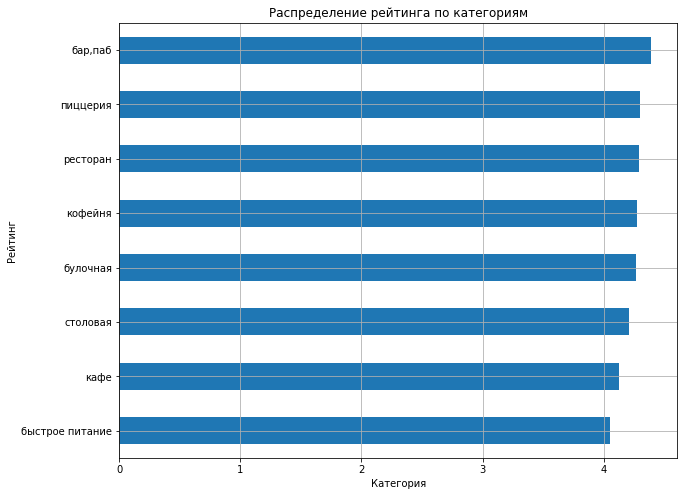

In [48]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
grouped.plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение рейтинга по категориям'
               
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Рейтинг')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Рейтинг по всем категориям сильно не различается, все значения от 4 до 4.4, разброса сильного нет, стоит отметить, что в среднем все заведения из наших данных очень хорошие.

### 3.6. Исследование связи с рейтингом

In [49]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200691
category,0.190003
is_24_7,0.150173
chain,0.108092
seats,0.000000


Нас интересует связь рейтинга с другими данными, поэтому на экран был выведен только столбец `rating` итоговой матрицы корреляции.

Наибольшая корреляция рейтинга наблюдается с ценами заведения (`0.22`), категорией заведения (`0.2`) и округом заведения (`0.19`). Для остальных признаков коэффициент корреляции снижается с `0.19` до `0`.

Перед тем как перейти к дальнейшему анализу, визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn:

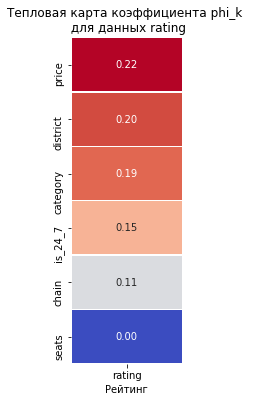

In [50]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

Теперь корреляция между рейтингом и другими признаками наглядно отображена. Можно продолжить исследование данных.

---

In [51]:
grouped = df.groupby('price')['rating'].mean()
grouped

price
высокие          4.436611
выше среднего    4.386348
низкие           4.173077
средние          4.297874
Name: rating, dtype: float64

Можно заметить, что, чем больше цены в заведении, тем больше его рейтинг.

### 3.7. Топ-15 популярных сетей в Москве

In [52]:
df['name'].value_counts()

Кафе                         189
Шоколадница                  120
Домино'с Пицца                76
Додо Пицца                    74
One Price Coffee              71
                            ... 
Кап кап                        1
Чойхона                        1
Подсолнухи                     1
Беру! Шашлык                   1
The Loft cafe & lobby bar      1
Name: name, Length: 5614, dtype: int64

In [53]:
grouped = df[df['chain'] == 1].groupby('name').agg(
    count=('name', 'size'),
    average_rating=('rating', 'mean'),
    category=('category', 'first')  # Предполагаем, что категория одинаковая для сети
).reset_index()

# Находим топ-15 популярных сетей
top_15 = grouped.nlargest(15, 'count')
top_15

,name,count,average_rating,category
746,Шоколадница,120,4.177500,кофейня
344,Домино'с Пицца,76,4.169737,пиццерия
340,Додо Пицца,74,4.286486,пиццерия
148,One Price Coffee,71,4.064789,кофейня
759,Яндекс Лавка,69,3.872464,ресторан
59,Cofix,65,4.075385,кофейня
170,Prime,50,4.116000,ресторан
679,Хинкальная,44,4.322727,быстрое питание
378,КОФЕПОРТ,42,4.147619,кофейня
431,Кулинарная лавка братьев Караваевых,39,4.394872,кафе


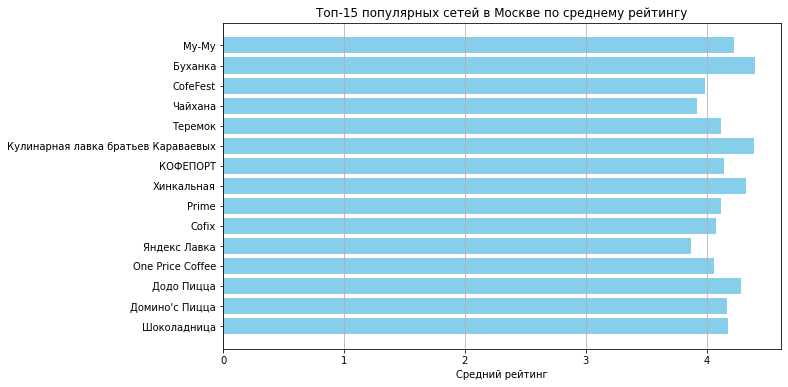

In [54]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(top_15['name'], top_15['average_rating'], color='skyblue')
plt.xlabel('Средний рейтинг')
plt.title('Топ-15 популярных сетей в Москве по среднему рейтингу')
plt.grid(axis='x')
plt.show()

#### Топ-3 по количеству:

In [55]:
top_3 = top_15.nlargest(3, 'count').reset_index()
top_3

,index,name,count,average_rating,category
0,746,Шоколадница,120,4.177500,кофейня
1,344,Домино'с Пицца,76,4.169737,пиццерия
2,340,Додо Пицца,74,4.286486,пиццерия


#### Топ-3 по рейтингу:

In [56]:
top_3 = top_15.nlargest(3, 'average_rating').reset_index()
top_3

,index,name,count,average_rating,category
0,273,Буханка,32,4.396875,булочная
1,431,Кулинарная лавка братьев Караваевых,39,4.394872,кафе
2,679,Хинкальная,44,4.322727,быстрое питание


#### Топ-3 по категории:

In [57]:
top_3_per_category = top_15.groupby('category').apply(lambda x: x.nlargest(3, 'average_rating')).reset_index(drop=True)
top_3_per_category

,name,count,average_rating,category
0,Буханка,32,4.396875,булочная
1,Хинкальная,44,4.322727,быстрое питание
2,Кулинарная лавка братьев Караваевых,39,4.394872,кафе
3,Му-Му,27,4.229630,кафе
4,Чайхана,37,3.924324,кафе
5,Шоколадница,120,4.177500,кофейня
6,КОФЕПОРТ,42,4.147619,кофейня
7,Cofix,65,4.075385,кофейня
8,Додо Пицца,74,4.286486,пиццерия
9,Домино'с Пицца,76,4.169737,пиццерия


Заметим, что по количеству заведений лидирует `Шоколадница` с большим отрывом.

ТОП-3 по количеству заведений: 

1. Шоколадница
2. Домино'с пицца
3. Додо пицца

ТОП-3 по рейтингу:

1. Буханка
2. Кулинарная лавка братьев Караваевых
3. Хинкальная


Количество по категориям в ТОП-15:

`Булочная` - 1
`Быстрое питание` - 1
`Кафе` - 3
`Кофейня` - 3
`Пиццерия` - 2
`Ресторан` - 3

Стоит отметить, что, чем больше заведений в сети, тем в среднем меньше его рейтинг, чего и стоило ожидать, ведь, чем больше мест, тем сложнее следить за качеством.

### 3.8. Вариация среднего чека заведения в зависимости от района Москвы

In [58]:
grouped_middle = df.groupby('district').agg(avg_middle=('middle_avg_bill', 'mean')).reset_index()
grouped_middle = grouped_middle.sort_values('avg_middle', ascending=True)
grouped_middle

,district,avg_middle
6,Юго-Восточный административный округ,654.097938
3,Северо-Восточный административный округ,716.611296
7,Юго-Западный административный округ,792.561702
0,Восточный административный округ,820.626923
4,Северо-Западный административный округ,822.222930
8,Южный административный округ,834.398089
2,Северный административный округ,927.959627
1,Западный административный округ,1053.225490
5,Центральный административный округ,1191.057547


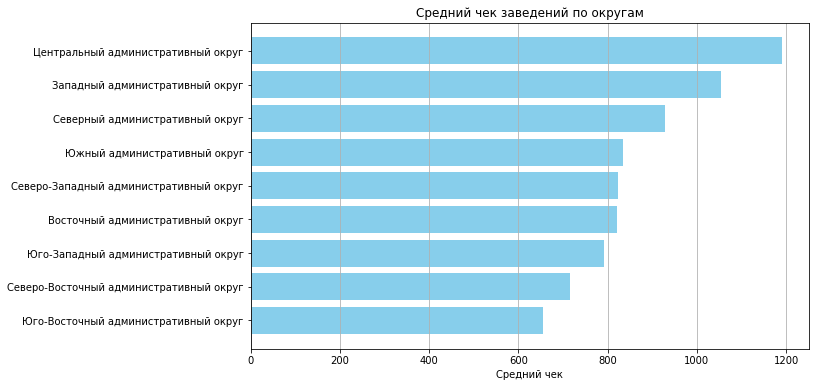

In [59]:
plt.figure(figsize=(10, 6))
plt.barh(grouped_middle['district'], grouped_middle['avg_middle'], color='skyblue')
plt.xlabel('Средний чек')
plt.title('Средний чек заведений по округам')
plt.grid(axis='x')
plt.show()

Можно заметить, что лидер по ценам и среднему чеку - центральный округ, кроме этого, чем дальше заведения от центра, тем меньше средний чек, чего и стоило ожидать.

---

#### Промежуточные выводы

Анализ взаимосвязи данных показал, что:

- Большая часть заведений принадлежит категориям - ресторан, кофейня, кафе. Остальные категории менее популярны.
- Центральный округ сильно лидирует по количеству заведений, остальные округа имеют примерно равное распределение заведений.
- Во всех округах преобладают несетевые заведения и исключений с аномалиями нет.
- В среднем в заведениях 110-200 посадочных мест, были обнарудены выбросы с кол-вом мест >400, в дальнейшем можно удалить эти данные.
- Значения рейтинга распределены нормально
- Чем больше цены в заведении, тем больше рейтинг
- Выделены топ-15 сетей Москвы
- Чем дальше округ от центра, тем ниже цены

---

## 4. Итоговый вывод и рекомендации

## Подведём итоги

В ходе исследования проанализировали данные 4508 заказов заведений города Москва. Данные включали персональную информацию заведений и особенности заказов. Акцент исследования был на том, чтобы найти взаимосвязи между рейтингом и другими факторами, изучить округа и категории заведений.

### Общий профиль заведений

Исследовательский анализ данных позволил сформировать профиль заведений

- Из 4508 проанализированных заказов заведений половина из низ была сделана в ресторанах, кафе и кофейнях, а остальные в категориях малого масштаба

- 60% заведений - несетевые, а средний чек по всем заведениям - 958 и средний рейтинг - 4.3

- Как правило, чем дальше заведение от центра, тем меньше в нем цены


### Факторы, влияющие на рейтинг заведения

На значение рейтинга заведения положительно влияют несколько факторов: географическое положение (округ), цены, категория и статус заведения (сетевое или нет)

* Чем больше цены в заведении, тем больше у него рейтинг

* Большая часть заведений имеют рейтинг 3.8 - 4.3

* Среднее количество посадочных мест в заведении - 108

* Центральный округ лидирует по кол-ву заведений, но при этом преобладают в нем сильно несетевые, что говорит о возможности развиваться "зелёным" заведениям именно там

### Рекомендации

Стоит посмотреть на заведения с низкими оценками и выявить причины таких оценок.

Дополнительно можно провести более детальную сегментацию, чтобы выделить конкретные группы заведений, например, изучить детальнее рестораны или кофейни.

Исходя из анализа, более выгодным является Центральный административный округ (25% заведений именно тут, 60% заведений несетевые)

Наибольшим спросом пользуются кафе, рестораны и кофейни (50% заведений), так как часто люди не завтракают дома, либо выходят посидеть в ресторане вечером, ведь в нынешнем времени тренд готовить дома уходит на задний план.

Стоит ли делать круглосуточное обсуживание, сказать сложно, этот показатель имеет положительную связь с рейтингом заведения (0.15), но непонятно, будет ли это приносить прибыль/убыток.

Актуальное среднее кол-во посадочных мест по категориям:
* кафе - 98
* ресторан - 122
* кофейня - 111
* бар/паб - 125
* столовая - 100
* быстрое питание - 99
* пиццерия - 94
* булочная - 89

Из анализа становится понятно, что, чем больше в районе доходы, тем дороже в нём заведения (типичный приём бизнесменов), поэтому, перед тем, как открывать свое заведение, стоит изучить рынок доходов в нужном районе.
